In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import to_datetime

In [2]:
## Loading Data
df=pd.read_csv("ai_financial_market_daily_realistic_synthetic.csv")
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB


In [4]:
df.describe()

,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%
count,10959.000000,10959.000000,10959.000000,10959.000000
mean,65.184504,44.126571,159.395988,0.025560
std,47.918247,41.639356,135.462185,0.749513
min,1.570000,-0.550000,-155.430000,-3.000000
25%,8.640000,3.610000,43.870000,-0.500000
50%,70.960000,35.220000,133.750000,0.000000
75%,99.600000,71.680000,258.300000,0.510000
max,163.830000,155.960000,565.500000,18.500000


In [5]:
df["Date"] = pd.to_datetime(df["Date"])


##Checking for Nulls

In [6]:
df.isna().sum()

Date                       0
Company                    0
R&D_Spending_USD_Mn        0
AI_Revenue_USD_Mn          0
AI_Revenue_Growth_%        0
Event                  10726
Stock_Impact_%             0
dtype: int64

Creating New Column to store Year

In [7]:
df["Year"]=df["Date"].dt.year

In [8]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


How Much Ammount Comapnies Spent Over their Product & Services

In [9]:
df["Company"].unique()

array(['OpenAI', 'Google', 'Meta'], dtype=object)

In [10]:
# Total Spending by Each Company
TS=df.groupby('Company')['R&D_Spending_USD_Mn'].sum()/1000
TS

Company
Google    423.34114
Meta      264.53307
OpenAI     26.48277
Name: R&D_Spending_USD_Mn, dtype: float64

In [11]:
df.columns

Index(['Date', 'Company', 'R&D_Spending_USD_Mn', 'AI_Revenue_USD_Mn',
       'AI_Revenue_Growth_%', 'Event', 'Stock_Impact_%', 'Year'],
      dtype='object')

In [12]:
TS

Company
Google    423.34114
Meta      264.53307
OpenAI     26.48277
Name: R&D_Spending_USD_Mn, dtype: float64

In [13]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [14]:
plt.style.use('dark_background')

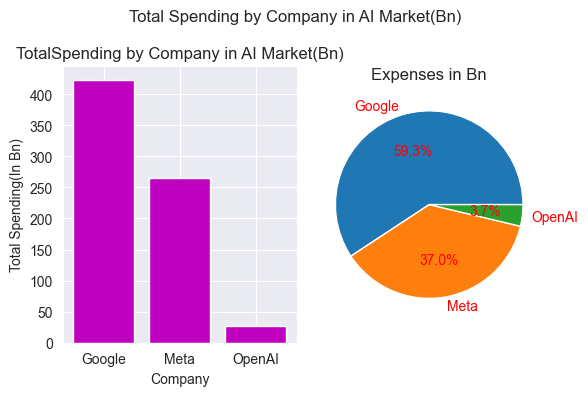

In [15]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
plt.bar(TS.index,TS.values,color="m")
plt.xlabel("Company")
plt.ylabel("Total Spending(In Bn)")
plt.title("TotalSpending by Company in AI Market(Bn)")
company=[]
spending=[]
for i in TS.index:
    company.append(i)
    spending.append(TS[i])


plt.subplot(1,2,2)
plt.pie(spending,labels=company,autopct='%1.1f%%',textprops={'color': 'red'})
plt.title("Expenses in Bn")
plt.suptitle("Total Spending by Company in AI Market(Bn)")
plt.tight_layout()
plt.show()

Revenue Generation

In [16]:
TRG=df.groupby("Company")['AI_Revenue_USD_Mn'].sum()/1000

TRG

Company
Google    284.49838
Meta      189.62182
OpenAI      9.46289
Name: AI_Revenue_USD_Mn, dtype: float64

Text(0.5, 0.98, 'Total Revenue by Company in AI Market(Bn)')

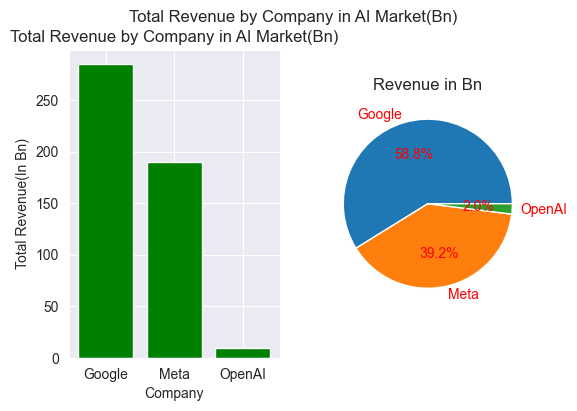

In [17]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
plt.bar(TRG.index,TRG.values,color="g")
plt.xlabel("Company")
plt.ylabel("Total Revenue(In Bn)")
plt.title("Total Revenue by Company in AI Market(Bn)")

plt.subplot(1,2,2)
plt.pie(TRG.values,labels=TRG.index,autopct='%1.1f%%',textprops={'color': 'red'})
plt.title("Revenue in Bn")
plt.suptitle("Total Revenue by Company in AI Market(Bn)")


## Company wise Analysis

## Analysis for Open AI

In [18]:
df_OAI= df[df["Company"]=="OpenAI"]

In [19]:
df_OAI.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36,2015
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41,2015
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23,2015
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93,2015
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09,2015


In [20]:
OAI_Y_E=df_OAI.df

In [21]:
OAI_Y_E.head()

,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn
Year,,
2015,1866.26,356.45
2016,1942.55,436.76
2017,2145.17,518.99
2018,2260.66,644.12
2019,2489.99,750.97


In [22]:
plt.figure(figsize=(6,6))
years=[]
for i in OAI_Y_E.index:
    years.append(i)

print(years)


[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


<Figure size 600x600 with 0 Axes>

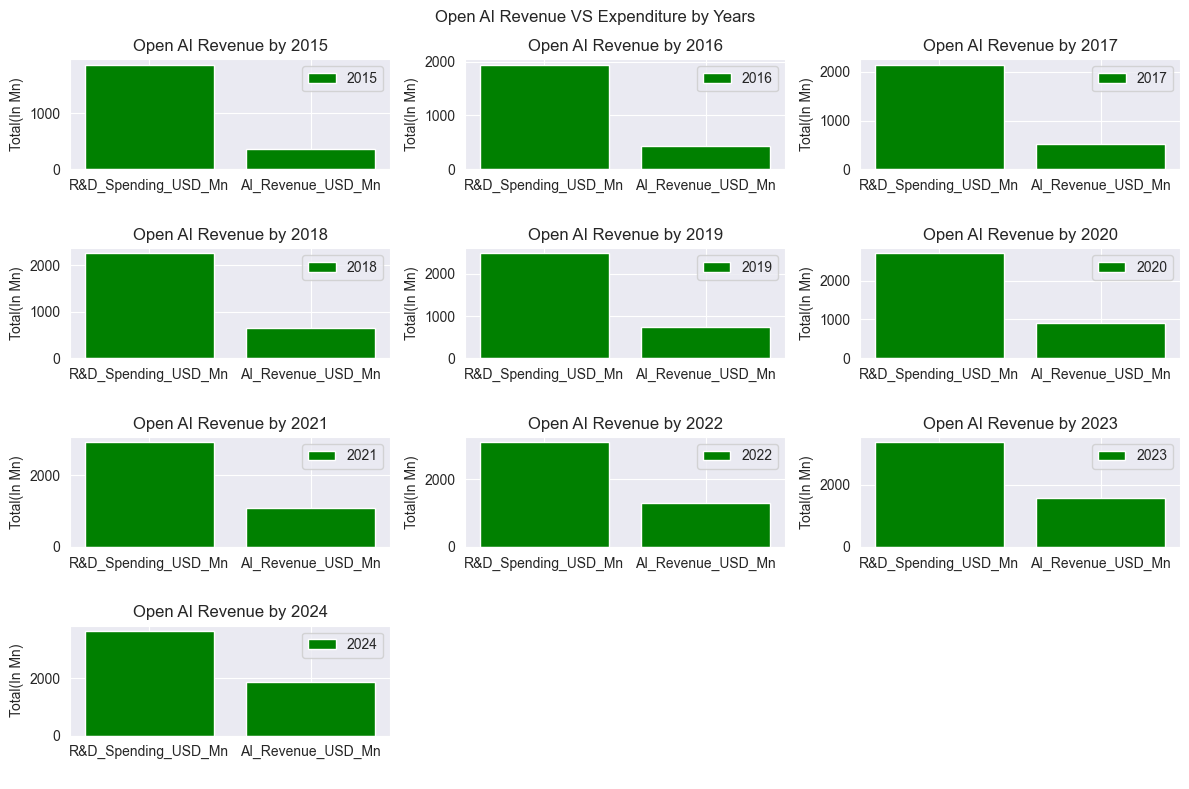

In [23]:
plt.figure(figsize=(12,8))
for i,year in enumerate(years):
    plt.subplot(4,3,i+1)
    plt.bar(OAI_Y_E.loc[year].index,\
            OAI_Y_E.loc[year].values,\
            color="g",\
            label=year)
    plt.legend()
    plt.xlabel(" ")
    plt.ylabel("Total(In Mn)")
    plt.title(f"Open AI Revenue by {year}")
    plt.suptitle("Open AI Revenue VS Expenditure by Years")
    plt.tight_layout()


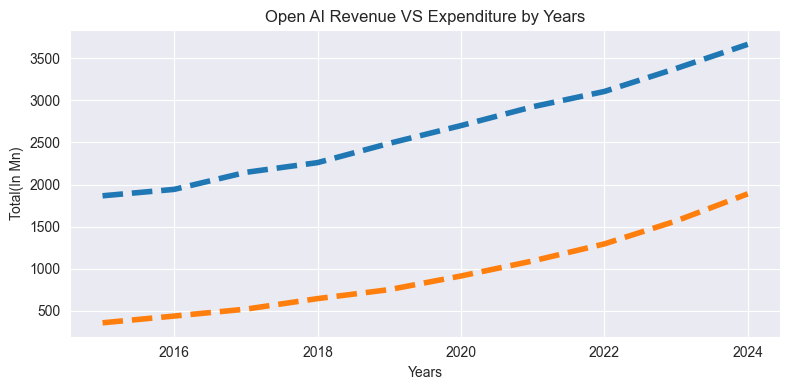

In [26]:
plt.figure(figsize=(8,4))
plt.plot(OAI_Y_E.index,\
         OAI_Y_E.values,\
        linewidth=4,\
        linestyle="dashed",\
         )


plt.xlabel("Years")
plt.ylabel("Total(In Mn)")
plt.title("Open AI Revenue VS Expenditure by Years")
plt.tight_layout()
plt.show()

In [36]:
df_OAI["Event"].isna()
df_OAI[~df_OAI["Event"].isna()]

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
19,2015-01-20,OpenAI,4.37,0.91,-9.27,Cloud AI launch,2.43,2015
77,2015-03-19,OpenAI,5.10,1.56,55.77,AI ethics policy update,2.80,2015
166,2015-06-16,OpenAI,6.01,0.28,-72.28,AI ethics policy update,-1.00,2015
246,2015-09-04,OpenAI,6.81,1.35,35.13,AI-powered search update,2.08,2015
318,2015-11-15,OpenAI,5.84,0.69,-31.40,AI Ads Optimization upgrade,3.92,2015
...,...,...,...,...,...,...,...,...
3561,2024-10-01,OpenAI,9.93,5.81,480.91,AI partnership deal,-1.69,2024
3568,2024-10-08,OpenAI,11.30,5.67,467.06,AI ethics policy update,-0.46,2024
3585,2024-10-25,OpenAI,10.24,5.84,483.65,AI Video Recommendation upgrade,-0.75,2024
3590,2024-10-30,OpenAI,11.05,5.27,427.50,AI-powered search update,-2.52,2024


## Analysis for Google

In [38]:
df_G=df[df["Company"]=="Google"]

In [39]:
df_G.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
3653,2015-01-01,Google,79.89,30.19,0.64,NaN,-0.02,2015
3654,2015-01-02,Google,78.99,30.44,1.47,NaN,-0.98,2015
3655,2015-01-03,Google,79.20,30.46,1.53,NaN,0.78,2015
3656,2015-01-04,Google,79.59,30.55,1.82,NaN,-0.41,2015
3657,2015-01-05,Google,81.50,30.59,1.97,NaN,-0.78,2015


In [46]:
G_YE=df_G.groupby('Year')[['R&D_Spending_USD_Mn', 'AI_Revenue_USD_Mn']].agg({'R&D_Spending_USD_Mn':"sum", 'AI_Revenue_USD_Mn':"sum"})

In [47]:
G_YE.head()

,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn
Year,,
2015,29189.88,10962.63
2016,31643.54,13156.27
2017,34069.58,15756.37
2018,36793.71,18924.12
2019,39719.53,22701.64


[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


<Figure size 600x600 with 0 Axes>

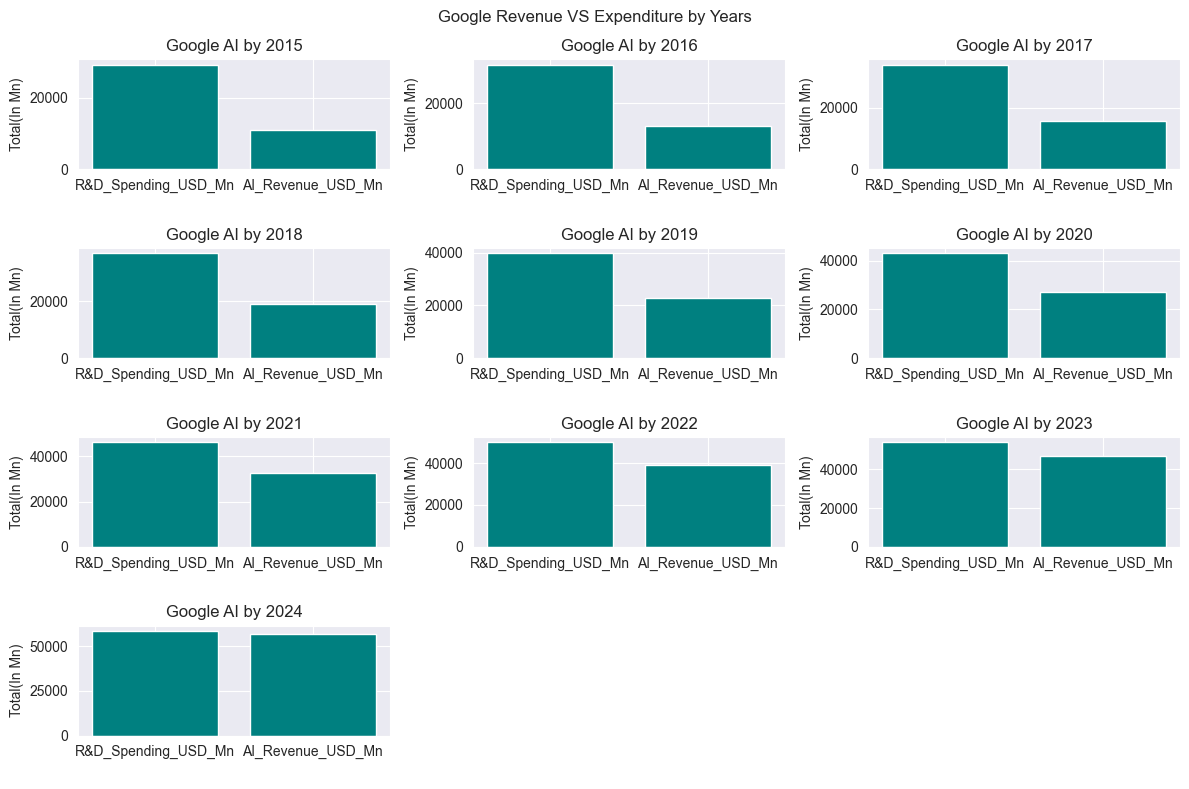

In [56]:
plt.figure(figsize=(6,6))
years=[]
for i in G_YE.index:
    years.append(i)

print(years)

plt.figure(figsize=(12, 8))
for i, year in enumerate(years):
    plt.subplot(4, 3, i + 1)
    plt.bar(G_YE.loc[year].index, \
            G_YE.loc[year].values, \
            color="teal", \
)

    plt.xlabel(" ")
    plt.ylabel("Total(In Mn)")
    plt.title(f"Google AI by {year}")
    plt.suptitle("Google Revenue VS Expenditure by Years")
    plt.tight_layout()

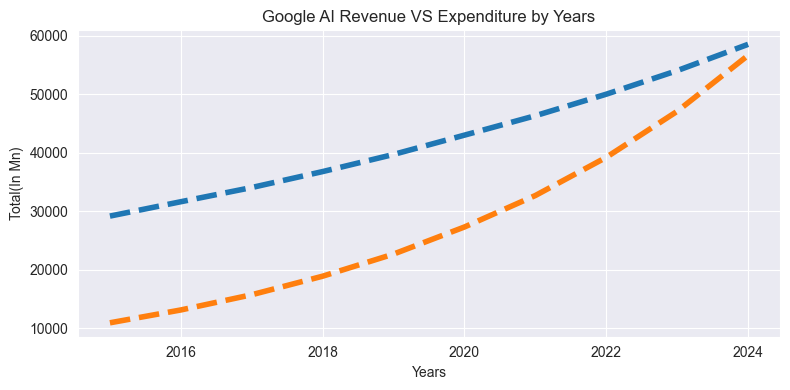

In [57]:
plt.figure(figsize=(8, 4))
plt.plot(G_YE.index, \
         G_YE.values, \
         linewidth=4, \
         linestyle="dashed", \
         )

plt.xlabel("Years")
plt.ylabel("Total(In Mn)")
plt.title("Google AI Revenue VS Expenditure by Years")
plt.tight_layout()
plt.show()

## Analysis for Meta

In [64]:
df_M=df[df["Company"]=="Meta"]
df_M.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year
7306,2015-01-01,Meta,50.39,18.95,-5.23,NaN,-0.42,2015
7307,2015-01-02,Meta,49.80,19.77,-1.16,NaN,0.63,2015
7308,2015-01-03,Meta,49.09,19.96,-0.21,NaN,0.73,2015
7309,2015-01-04,Meta,50.66,20.48,2.38,NaN,-0.26,2015
7310,2015-01-05,Meta,51.36,19.84,-0.80,NaN,-0.37,2015


In [69]:
M_YE = df_M.groupby('Year')[['R&D_Spending_USD_Mn', 'AI_Revenue_USD_Mn']].agg(
    {'R&D_Spending_USD_Mn': "sum", 'AI_Revenue_USD_Mn': "sum"})
M_YE

,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn
Year,,
2015,18248.09,7304.13
2016,19763.85,8768.17
2017,21260.37,10501.44
2018,22947.79,12596.20
2019,24861.99,15127.71
2020,26884.91,18214.22
2021,28948.55,21794.18
2022,31273.90,26151.89
2023,33777.24,31385.74


[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


<Figure size 600x600 with 0 Axes>

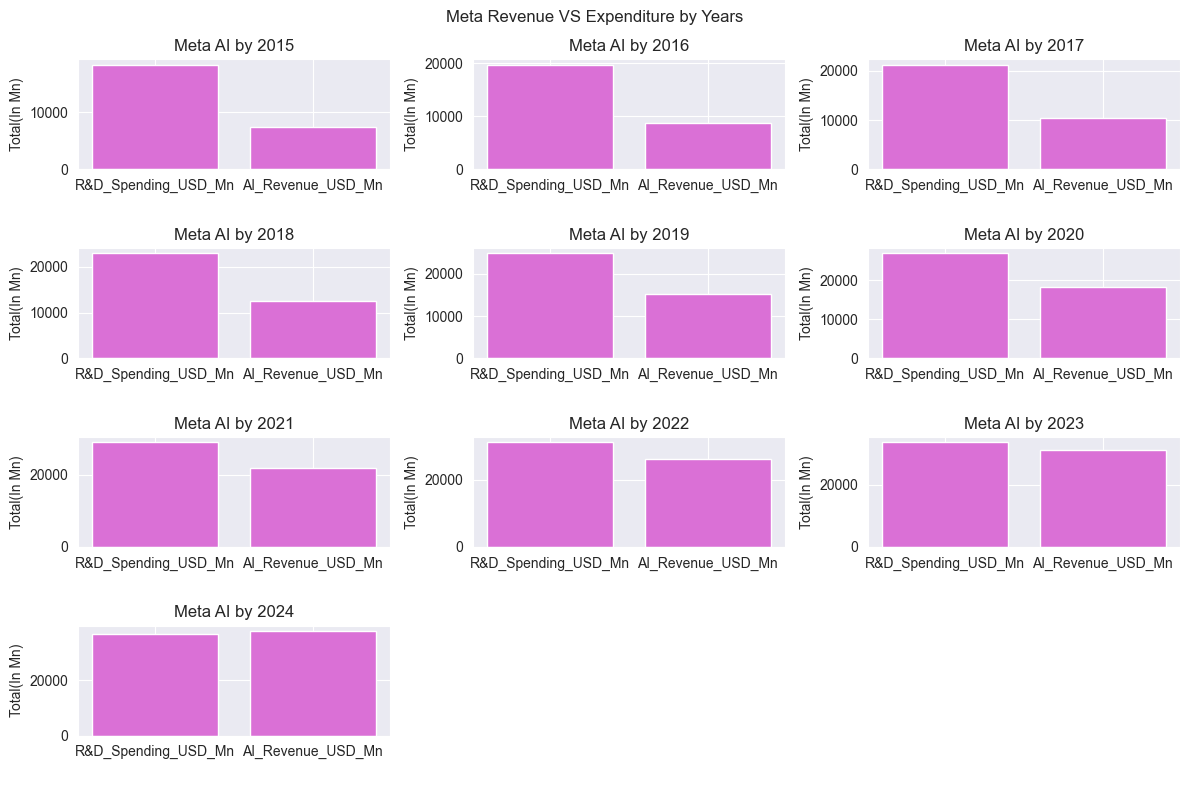

In [67]:
plt.figure(figsize=(6, 6))
years = []
for i in M_YE.index:
    years.append(i)

print(years)

plt.figure(figsize=(12, 8))
for i, year in enumerate(years):
    plt.subplot(4, 3, i + 1)
    plt.bar(M_YE.loc[year].index, \
            M_YE.loc[year].values, \
            color="orchid", \
            )

    plt.xlabel(" ")
    plt.ylabel("Total(In Mn)")
    plt.title(f"Meta AI by {year}")
    plt.suptitle("Meta Revenue VS Expenditure by Years")
    plt.tight_layout()

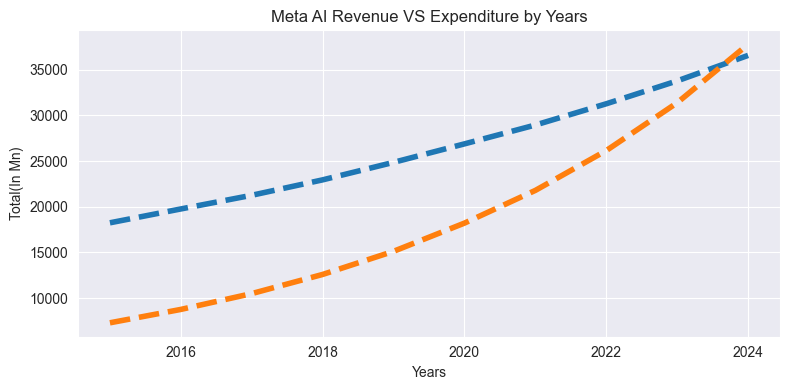

In [68]:
plt.figure(figsize=(8, 4))
plt.plot(M_YE.index, \
         M_YE.values, \
         linewidth=4, \
         linestyle="dashed", \
         )

plt.xlabel("Years")
plt.ylabel("Total(In Mn)")
plt.title("Meta AI Revenue VS Expenditure by Years")
plt.tight_layout()
plt.show()